# Aufgabe 3: Faltungstheorem
Das Faltungstheorem
\begin{align}
 F * G &= \mathcal{F}^{-1}(\mathcal{F}(F) \cdot \mathcal{F}(G))
\end{align}

besagt, dass eine Faltung im Ortsraum äquivalent zu einer Multiplikation im Frequenzraum ist.
Prüfen Sie die Gültigkeit dieses Theorems an mindestens zwei praktischen Beispielen (Auswahl von Filtermasken, Fouriertransformation der Filtermasken, $\ldots$)!
Vergleichen und analysieren Sie sowohl die Ergebnisse, als auch die Rechenzeiten im Hinblick auf verschiedene Filtergrößen!

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import imageio
import numpy as np
import scipy.ndimage

import math

In [2]:
# image_filter = 'Bilder/*.jpg'
image_filter = 'Bilder/Aerial.jpg'

## 1. Definition der Faltungsmaske
Definieren Sie hier die zu prüfende Faltungsmaske `A`.

In [3]:
A = np.array([[1]*31]*31)
A

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1,

## 2. Laden des Bildes

In [4]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

## 3. Normalisieren des Bildes

In [5]:
image_max = np.float32(np.max(image))  # Maximum bestimmen
image_min = np.float32(np.min(image))  # Minimum bestimmen
image = (np.float32(image) - image_min) / (image_max-image_min)
image.shape

(768, 764)

## 3. Berechnung der Fouriertransformation
Setzen Sie hier ihre Lösung aus der vorigen Aufgabe ein:

In [6]:
image_transformed = np.fft.fftshift(np.fft.fft2(image))
image_transformed.shape

(768, 764)

Berechnen Sie nun die Fouriertransformation der Faltungsmaske. Achten Sie darauf, dass das Ergebnis dieser Operation dieselbe Größe hat wie `image_transformed`!

In [7]:
rows=image_transformed.shape[0]-A.shape[0]
cols=image_transformed.shape[1]-A.shape[1]
A=np.pad(A,((0,rows),(0,cols)),'constant',constant_values = (0,0))

A_transformed = np.fft.fftshift(np.fft.fft2(A))
A_transformed.shape

(768, 764)

## 4. Filterung

Definieren Sie nun eine Funktion `ex3_filter_in_freq_domain`, die einen Filter im Frequenzbereich auf ein bereits fouriertransformiertes Bild anwendet. Beachten Sie das Faltungstheorem!

In [8]:
def ex3_filter_in_freq_domain(spectrum, transformed_filter):
    
    spectrum=spectrum*transformed_filter
    
    return spectrum

Das transformierte Bild (Spektrum) wird nun gefiltert. Fügen Sie hier eine Laufzeitmessung hinzu:

In [9]:
image_transformed_filtered = ex3_filter_in_freq_domain(image_transformed, A_transformed)
image_transformed_filtered 

array([[ 16.74902323-5.32080721e-13j,  -5.99965356-2.86077058e+01j,
         -9.2483954 +3.69921412e+00j, ...,  20.14944911-4.96630238e+00j,
         -9.2483954 -3.69921412e+00j,  -5.99965356+2.86077058e+01j],
       [  5.51306079+6.66296587e+00j,  18.03138234-7.82245744e+00j,
         -4.47276615-1.65517864e+01j, ...,  10.02738611+8.24632151e+00j,
          1.13604106+8.86778982e+00j,  -8.0286636 +1.28882733e+01j],
       [  3.92647148-6.69896583e-01j, -11.97439954+4.25019811e+00j,
          5.74978   -3.03495681e+00j, ...,   4.236128  +4.10482569e+00j,
        -15.88847096+6.58996378e-01j, -15.83069253+1.82932836e+01j],
       ...,
       [ 11.1015481 -3.40504643e+00j, -16.6391626 -6.39311483e+00j,
          0.48548778+4.54610436e+00j, ...,   0.72197283-2.20168108e+00j,
         -5.54668943+3.76522099e+00j,  -6.10419389+1.71158069e+01j],
       [  3.92647148+6.69896583e-01j, -15.83069253-1.82932836e+01j,
        -15.88847096-6.58996378e-01j, ...,  -3.112693  -9.33726341e+00j,
       

## 5. Inverse Filterung
Das veränderte Spektrum soll nun in den Ortsbereich zurücktransformiert werden. Verwenden Sie dazu die entsprechenden Funktionen des Paketes `numpy.fft`.

In [10]:
image_filtered = np.fft.ifft2((np.fft.ifftshift(image_transformed_filtered)))
image_filtered=np.abs(image_filtered)*255

Vergleichen Sie nun das gefilterte Bild mit dem Originalbild:

<IPython.core.display.Javascript object>


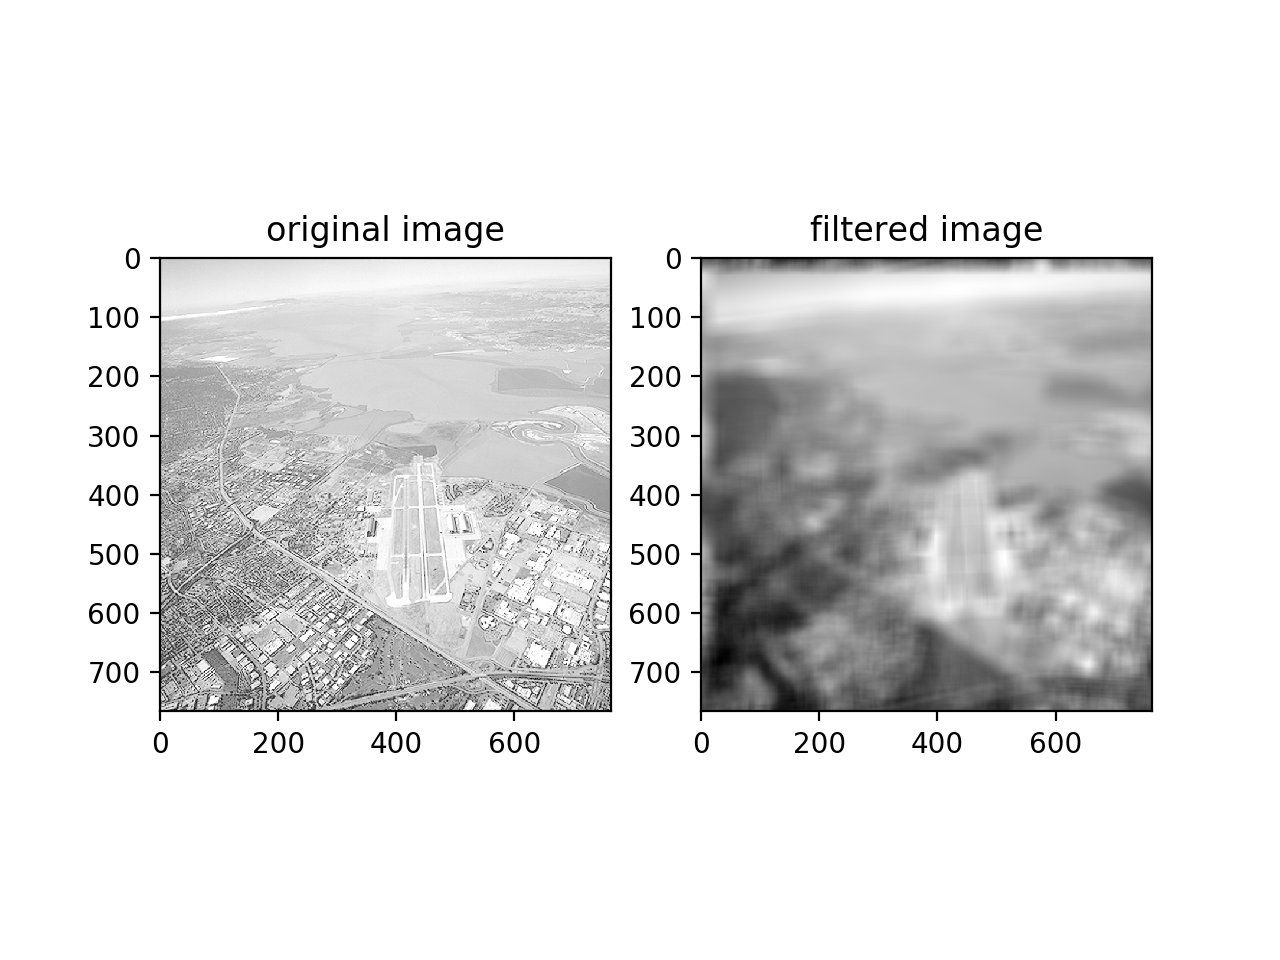

In [11]:
plt.figure('Image')

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(image_filtered, cmap='gray')

## 6. Vergleich mit regulärer Faltung
Im Folgenden wird das Bild über eine `scipy.ndimage.filters`-Routine mit `A` gefaltet. Ermitteln Sie hier die Laufzeit!

In [12]:
import time

A = np.array([[1]*31]*31)

start=time.time()
image_convolved = scipy.ndimage.filters.convolve(image, A, mode='constant')
end=time.time()
print('time cost: ', end-start, 's')

time cost:  0.5594120025634766 s


In [13]:
print(image.shape)
image_convolved

(768, 764)


array([[204.38432, 217.19215, 229.9804 , ..., 263.08237, 248.47844,
        233.85883],
       [217.41962, 231.04706, 244.65883, ..., 279.77255, 264.23923,
        248.68236],
       [230.50981, 244.96863, 259.40393, ..., 296.4902 , 280.02747,
        263.53726],
       ...,
       [187.52942, 198.58824, 210.34119, ..., 189.6    , 181.1098 ,
        171.26668],
       [178.9451 , 189.67844, 200.94118, ..., 179.58824, 171.82353,
        162.57256],
       [172.24313, 182.5255 , 193.17647, ..., 168.35687, 161.21176,
        152.42354]], dtype=float32)

Vergleichen Sie `image_convolved` mit `image_filtered`, indem Sie die Bilder nebeneinander anzeigen:

<IPython.core.display.Javascript object>


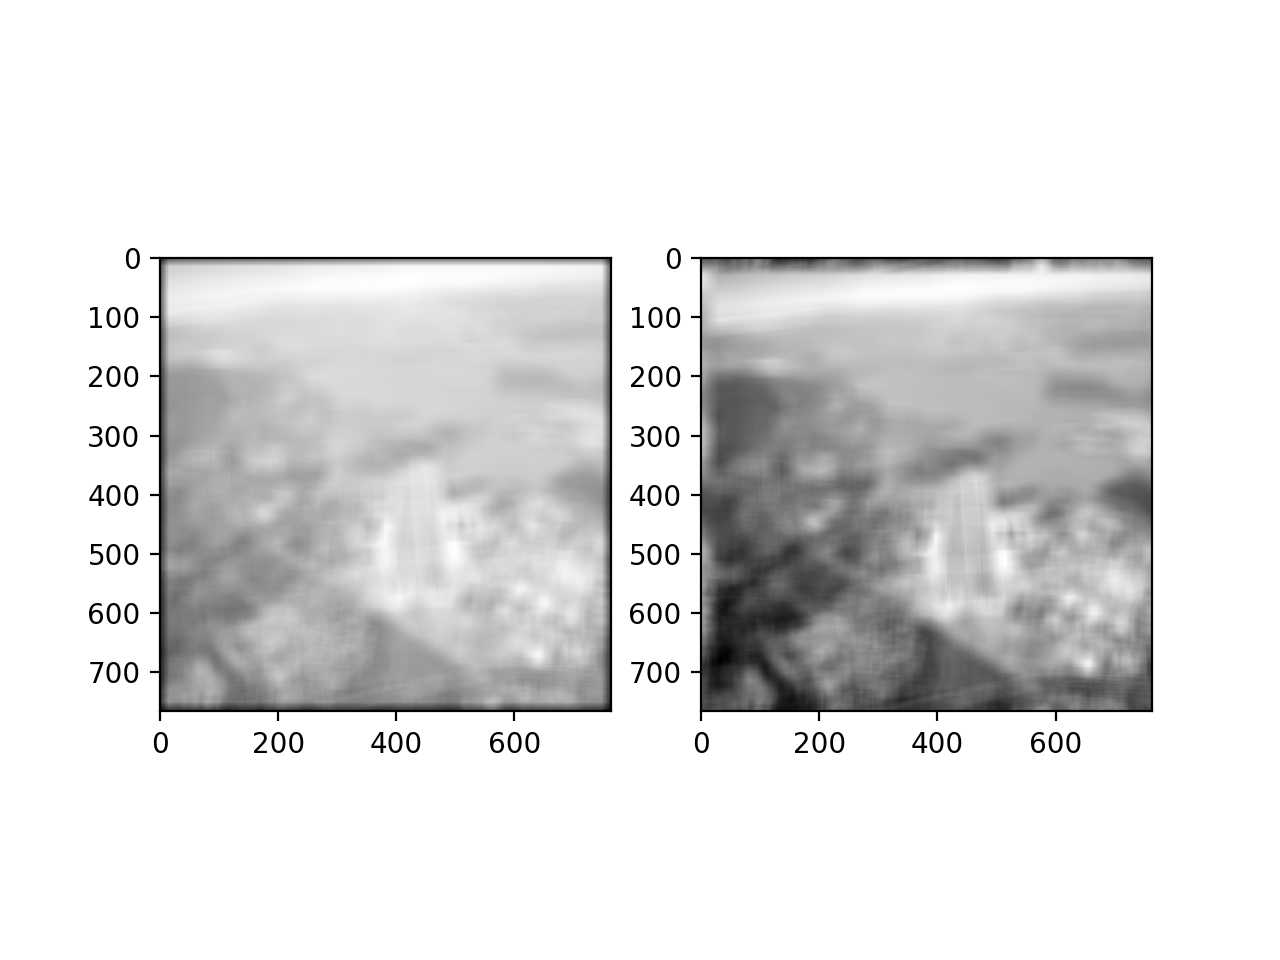

In [14]:
plt.figure('Image')

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(image_convolved, cmap='gray')
ax2.imshow(image_filtered, cmap='gray')